In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

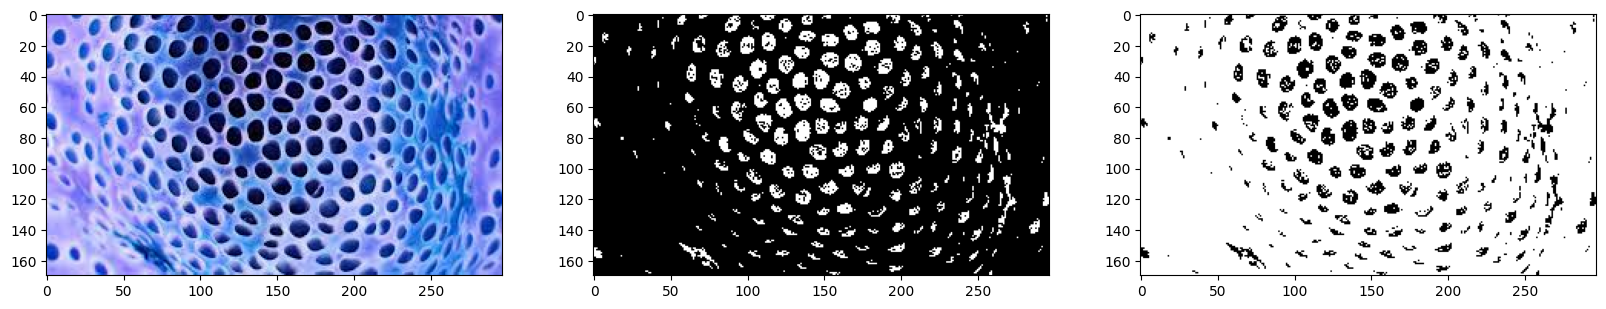

In [9]:
image = cv2.imread("./imgs/holes1.jpg")
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 12, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
# convert to 0 and 1 values
bw[bw > 0] = 1

bw_inverted = cv2.bitwise_not(bw)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(image)
ax[1].imshow(bw, cmap="gray")
ax[2].imshow(bw_inverted, cmap="gray")
plt.show()

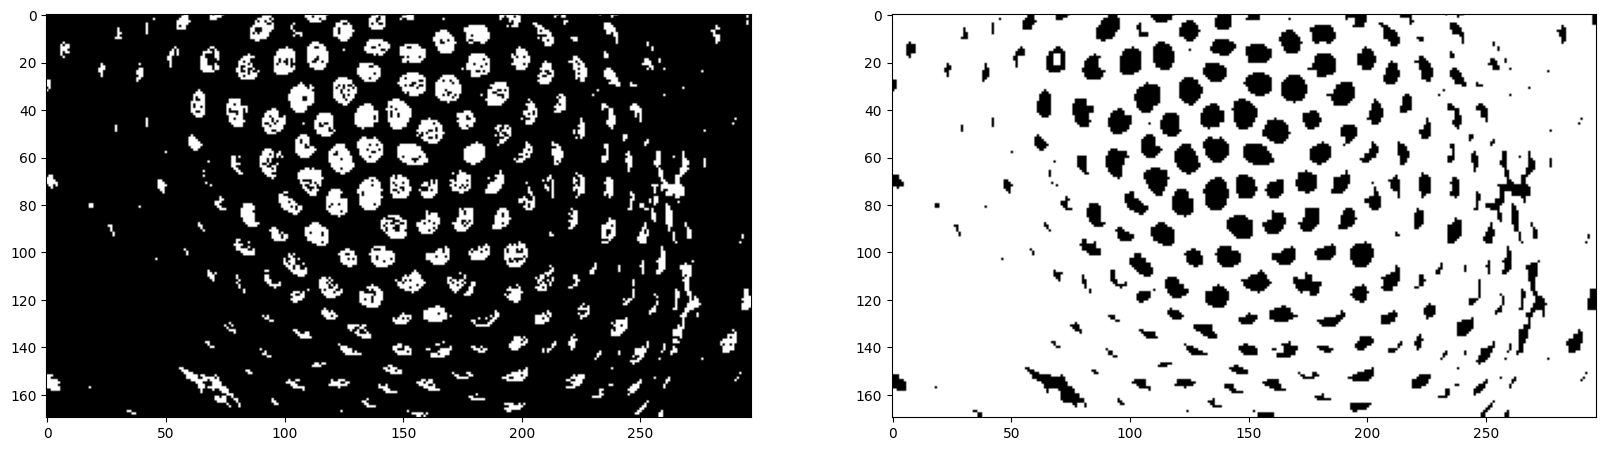

In [11]:
#Fill the holes in the bw image
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
closing = cv2.bitwise_not(closing)

# or
def close_holes(img:np.array,kernel:np.array)-> np.array:
    inverse = cv2.bitwise_not(img)
    w, h = inverse.shape
    im_floodfill = inverse.copy()
    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = inverse.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(bw, cmap="gray")
ax[1].imshow(closing, cmap="gray")
plt.show()